In [2]:
import ipyvuetify as v
import ipywidgets as widgets
import numpy as np
import pandas as pd
import src.input_pipeline as input_pipeline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats, display
%matplotlib inline
set_matplotlib_formats('svg')
import seaborn as sns
sns.set()

In [50]:
cleaned_data = input_pipeline.get_data()
landkreis_list = sorted(cleaned_data["Landkreis"].drop_duplicates())
branchen_list = ["Andere", "Gastronomie", "Gesundheitswesen", "Industrie"]
mitarbeiterzahl_list = ["<10", "10-29", "30-49", "50-99", "100-249", "250+"]
planumsatz_list = ["<10k", "10-29k", "30-49k", "50-99k", "100-249k", "250k+"]

## Eingabe

In [60]:
input_components = []

branchen_label = widgets.HTML(value="Branche:")
branche = widgets.Dropdown(options=branchen_list, layout=widgets.Layout(width='220px'))
input_components.extend([branchen_label, branche])

landkreis_label = widgets.HTML(value="Landkreis:")
landkreis = widgets.Combobox(options=landkreis_list, ensure_option=True, layout=widgets.Layout(width='220px'))
input_components.extend([landkreis_label, landkreis])

mitarbeiterzahl_label = widgets.HTML(value="Mitarbeiterzahl:")
mitarbeiterzahl = widgets.Dropdown(options=mitarbeiterzahl_list, layout=widgets.Layout(width='220px'))
input_components.extend([mitarbeiterzahl_label, mitarbeiterzahl])

planumsatz_label = widgets.HTML(value="Voraussichtlicher Umsatz (Monat):")
planumsatz = widgets.Dropdown(options=planumsatz_list, layout=widgets.Layout(width='220px'))
input_components.extend([planumsatz_label, planumsatz])

berechnen_button = widgets.Button(description='Berechnen')
input_components.append(berechnen_button)

all_widgets = v.Container( _metadata={'mount_id': "content-nav"}, children=[widgets.VBox(input_components)])
all_widgets

Container(children=[VBox(children=(HTML(value='Branche:'), Dropdown(layout=Layout(width='220px'), options=('An…

# Prognose

In [5]:
infection_out = widgets.Output(layout=widgets.Layout(height='auto', width='auto'))
economy_out = widgets.Output(layout=widgets.Layout(height='auto', width='auto'))

In [33]:
def proxy_model(branche, landkreis, mitarbeiterzahl, planumsatz):
    x = np.linspace(0.0, 10.0, 10)
    y = np.cumsum(np.random.randn(10)*10).astype(int)
    infect_df = pd.DataFrame({"Zeit (Einheit?)":x, "Anzahl Infektionen": y})
    x = np.linspace(0.0, 10.0, 10)
    y = np.cumsum(np.random.randn(10)*10).astype(int)
    umsatz_df = pd.DataFrame({"Zeit (Einheit?)":x, "Umsatz": y})
    return infect_df, umsatz_df
    

In [52]:
def on_button_clicked(b):
    # Werte einlesen
    
    # Model aufrufen
    if b is None:
        infect_df = pd.DataFrame({"Zeit (Einheit?)":[], "Anzahl Infektionen": []})
        umsatz_df = pd.DataFrame({"Zeit (Einheit?)":[], "Umsatz": []})
    else:
        infect_df, umsatz_df = proxy_model(branche.value, landkreis.value, mitarbeiterzahl.value, planumsatz.value)
    # Plotten
    with infection_out:
        infection_out.clear_output()
        infektion_lk_lineplot = sns.lineplot(x="Zeit (Einheit?)", y="Anzahl Infektionen", data=infect_df)
        infektion_lk_lineplot.set_title("Entwicklung der Infektionen im Landkreis")
        plt.show()
        
    with economy_out:
        economy_out.clear_output()
        umsatz_lineplot = sns.lineplot(x="Zeit (Einheit?)", y="Umsatz", data=umsatz_df)
        umsatz_lineplot.set_title("Entwicklung des Umsatzrückgangs")
        plt.show()

berechnen_button.on_click(on_button_clicked)

In [53]:
### Infektionen

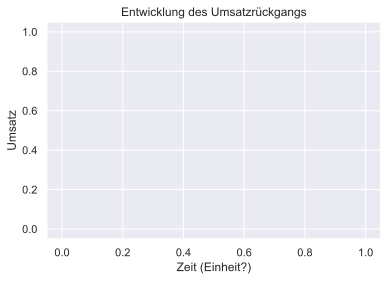

In [54]:
on_button_clicked(None)

In [55]:
diagramm_grid = widgets.GridspecLayout(2, 1)
diagramm_grid[0, 0] = infection_out
diagramm_grid[1, 0] = economy_out

In [56]:
# v.Tabs(_metadata={'mount_id': 'content-main'}, children=[
#     v.Tab(children=['Wirtschaftsmodell']),
#     v.Tab(children=['Tab2']),
#     v.TabItem(children=[
#         widgets.AppLayout(header=None,left_sidebar=None, center=diagramm_grid, right_sidebar=None, footer=None)
#     ]),
# ])

In [57]:
v.Container(_metadata={'mount_id': 'content-main'}, children=[
        diagramm_grid
])

Container(children=[GridspecLayout(children=(Output(layout=Layout(grid_area='widget001', height='auto', width=…